# Practical task 1#

# Part 1#

## Problem 1##

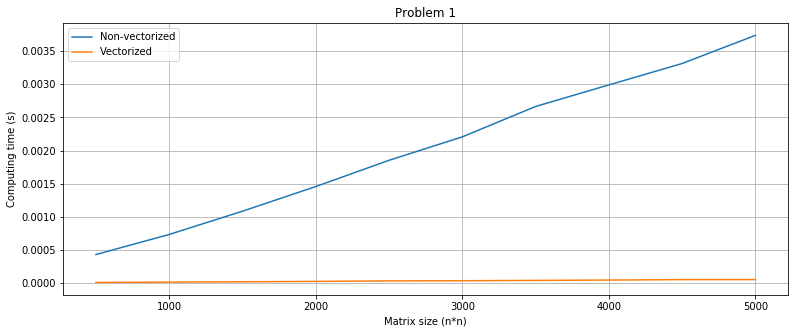

In [244]:
from timeit import timeit
import matplotlib.pyplot as plt
import numpy as np
import functions as func
import functions_vectorized as func_v

matrix_size = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])

# create n*n matrix filled with 1
matrix_list = [np.ones((i, i)) for i in matrix_size]
time_non_vect = []
time_vect = []

for x in matrix_list:
    # run func 100 times to get average result
    time_non_vect.append(timeit('func.prod_non_zero_diag(x)', number=100, globals=globals())/100)
    time_vect.append(timeit('func_v.prod_non_zero_diag(x)', number=100, globals=globals())/100)
    
    
graph = plt.figure(figsize=(13, 5))
ax1 = graph.add_subplot(111)

ax1.plot(matrix_size, time_non_vect, label="Non-vectorized")
ax1.plot(matrix_size, time_vect, label="Vectorized")
ax1.set_title("Problem 1")
ax1.set_xlabel("Matrix size (n*n)")
ax1.set_ylabel("Computing time (s)")
ax1.grid()
ax1.legend()

plt.show()

##Problem 2##

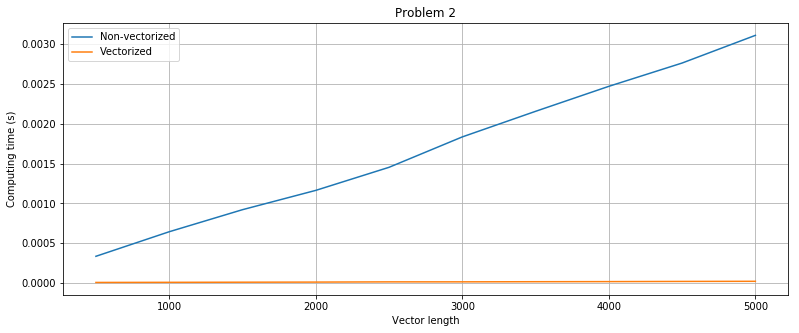

In [13]:
vector_length = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])

vectors_list = [(np.random.randint(10, size=i), (np.random.randint(10, size=i))) for i in vector_length]
                 
time_non_vect = []
time_vect = []

for (x, y) in vectors_list:
    time_non_vect.append(timeit('func.are_multisets_equal(x, y)', number=100, globals=globals())/100)
    time_vect.append(timeit('func_v.are_multisets_equal(x, y)', number=100, globals=globals())/100)
                 
graph = plt.figure(figsize=(13, 5))
ax1 = graph.add_subplot(111)

ax1.plot(vector_length, time_non_vect, label="Non-vectorized")
ax1.plot(vector_length, time_vect, label="Vectorized")
ax1.set_title("Problem 2")
ax1.set_xlabel("Vector length")
ax1.set_ylabel("Computing time (s)")
ax1.grid()
ax1.legend()

plt.show()

##Problem 3##

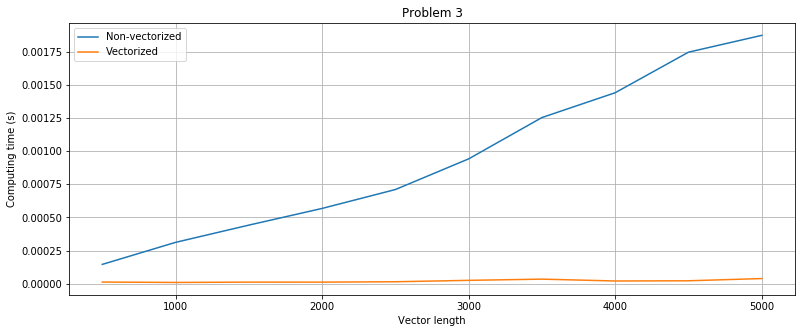

In [12]:
vector_length = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])

vectors_list = [np.random.randint(10, size=i) for i in vector_length]

time_non_vect = []
time_vect = []

for x in vectors_list:
    time_non_vect.append(timeit('func.max_after_zero(x)', number=100, globals=globals())/100)
    time_vect.append(timeit('func_v.max_after_zero(x)', number=100, globals=globals())/100)
                 
graph = plt.figure(figsize=(13, 5))
ax1 = graph.add_subplot(111)

ax1.plot(vector_length, time_non_vect, label="Non-vectorized")
ax1.plot(vector_length, time_vect, label="Vectorized")
ax1.set_title("Problem 3")
ax1.set_xlabel("Vector length")
ax1.set_ylabel("Computing time (s)")
ax1.grid()
ax1.legend()

plt.show()

##Problem 4##

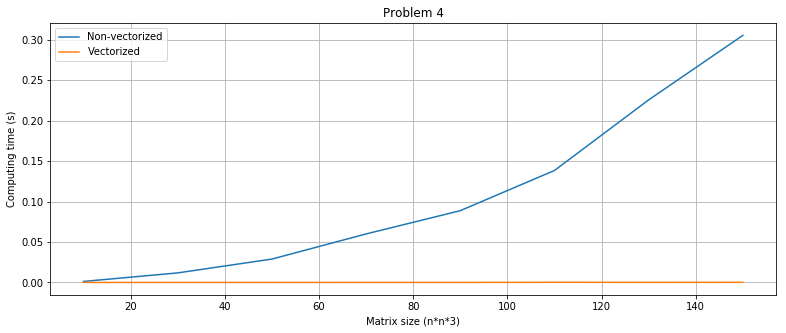

In [14]:
matrix_size = np.array([10, 30, 50, 70, 90, 110, 130, 150])

# create n*n*3 matrix with random numbers in [0, 10) interval
matrix_list = [np.random.randint(10, size=(i, i, 3)) for i in matrix_size]
time_non_vect = []
time_vect = []

for x in matrix_list:
    # run func 100 times to get average result
    # coefs is 1d array of size 3 with random samples from a uniform distribution over [0, 1)
    time_non_vect.append(timeit('func.convert_image(x, np.random.rand(3))', number=100, globals=globals())/100)
    time_vect.append(timeit('func_v.convert_image(x, np.random.rand(3))', number=100, globals=globals())/100)
    
    
graph = plt.figure(figsize=(13, 5))
ax1 = graph.add_subplot(111)

ax1.plot(matrix_size, time_non_vect, label="Non-vectorized")
ax1.plot(matrix_size, time_vect, label="Vectorized")
ax1.set_title("Problem 4")
ax1.set_xlabel("Matrix size (n*n*3)")
ax1.set_ylabel("Computing time (s)")
ax1.grid()
ax1.legend()

plt.show()

Let's take a look on example of function's work. This is image before convert_image.
![image](tmp1.jpg)

In [262]:
from scipy.misc import imread, imshow, imsave

img_array = imread('tmp1.jpg')

gray_img = func_v.convert_image(img_array, np.array([0.299, 0.587, 0.114]))

imshow(gray_img)

![image](gray_scale_img.jpg)

##Problem 5##

Part of idea for vectorized implementation was taken form [here.](tmp1.jpg)

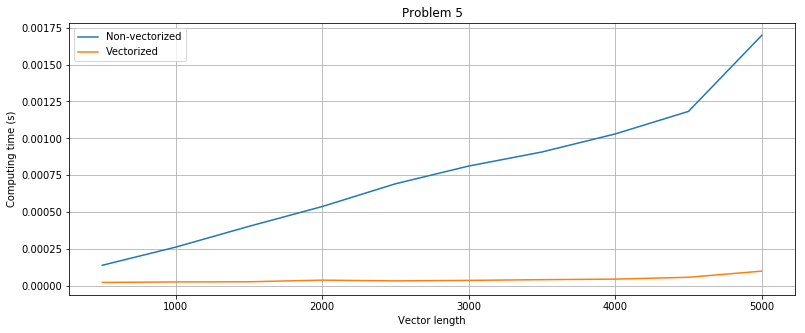

In [10]:
vector_length = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])

vectors_list = [np.random.randint(3, size=i) for i in vector_length]

time_non_vect = []
time_vect = []

for x in vectors_list:
    time_non_vect.append(timeit('func.run_length_encoding(x)', number=100, globals=globals())/100)
    time_vect.append(timeit('func_v.run_length_encoding(x)', number=100, globals=globals())/100)
                 
graph = plt.figure(figsize=(13, 5))
ax1 = graph.add_subplot(111)

ax1.plot(vector_length, time_non_vect, label="Non-vectorized")
ax1.plot(vector_length, time_vect, label="Vectorized")
ax1.set_title("Problem 5")
ax1.set_xlabel("Vector length")
ax1.set_ylabel("Computing time (s)")
ax1.grid()
ax1.legend()

plt.show()

##Problem 6##
Solution for vectorized one was taken from [here.](https://stackoverflow.com/questions/28687321/computing-euclidean-distance-for-numpy-in-python)

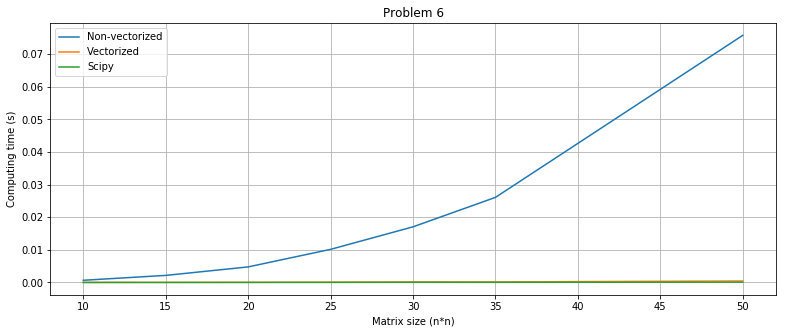

In [19]:
from scipy.spatial.distance import cdist

matrix_size = np.array([10, 15, 20, 25, 30, 35, 50])

# create n*n matrix filled with random ints in [0, 10) interval
matrix_list = [np.random.randint(10, size=(i, i)) for i in matrix_size]
time_non_vect = []
time_vect = []
time_scipy = []

for x in matrix_list:
    # run func 100 times to get average result
    # I will use identical matrix as a second argument, because it won't affect the result
    time_non_vect.append(timeit('func.pairwise_distance(x, x)', number=100, globals=globals())/100)
    time_vect.append(timeit('func_v.pairwise_distance(x, x)', number=100, globals=globals())/100)
    time_scipy.append(timeit('cdist(x, x)', number=100, globals=globals())/100)
    
    
graph = plt.figure(figsize=(13, 5))
ax1 = graph.add_subplot(111)

ax1.plot(matrix_size, time_non_vect, label="Non-vectorized")
ax1.plot(matrix_size, time_vect, label="Vectorized")
ax1.plot(matrix_size, time_scipy, label="Scipy")

ax1.set_title("Problem 6")
ax1.set_xlabel("Matrix size (n*n)")
ax1.set_ylabel("Computing time (s)")
ax1.grid()
ax1.legend()

plt.show()

It is practically impossible to notice difference between vectorized pairwise and scipy implementations beccause of scale, so that I will make separate graph for them.

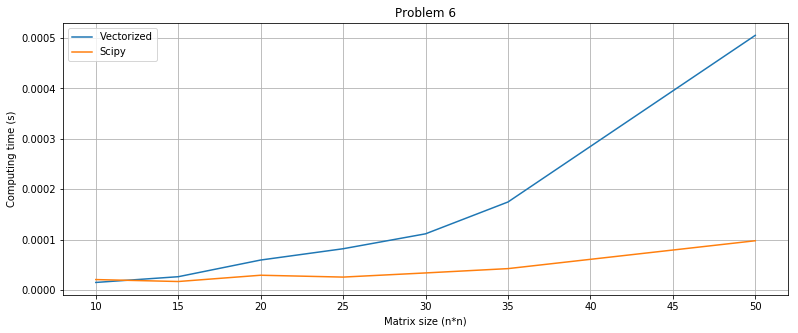

In [18]:
graph = plt.figure(figsize=(13, 5))
ax1 = graph.add_subplot(111)

ax1.plot(matrix_size, time_vect, label="Vectorized")
ax1.plot(matrix_size, time_scipy, label="Scipy")

ax1.set_title("Problem 6")
ax1.set_xlabel("Matrix size (n*n)")
ax1.set_ylabel("Computing time (s)")
ax1.grid()
ax1.legend()

plt.show()

##Yandex contest.##

[Unvectorized](https://official.contest.yandex.ru/contest/5016/run-report/4961552/)

[Vectorized](https://official.contest.yandex.ru/contest/5016/run-report/4966404/)

#Part 2#

##Problem 1##

In [248]:
import pandas as pd
data = pd.read_csv("data.csv")

#fill all NaN cells with mean value of column
data.fillna(data.mean().astype(int), inplace=True)

#check if there is still some NaN values
print (data.isnull().any().any())

False


##Problem 2##

In [249]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

scores = pd.read_csv("scores.csv", names = ['score'])


regr = LinearRegression()
    print (abs(cross_val_score(regr, data, y=scores, cv=10, scoring='neg_mean_squared_error').mean()))

243.859405495


##Problem 3##

In [250]:
import numpy as np

attendance = pd.read_csv("attendance.csv", header=0, names=['Attendance'])

#count number of visits for every student and add column with this information to data
data['Attendance'] = attendance['Attendance'].apply(lambda x: x.split(';').count('+'))

support = pd.read_table("school_support.txt", names=['student num'])

#create array and fill with data
support_col = np.zeros((len(data),), dtype=np.int)
support_col[support['student num'] - 1] = 1

#add new column
data['support'] = support_col
#print (data)

##Problem 4##

In [251]:
#extract data from broken column to new two
data["plans_university"], data["past_failures"] = zip(*data["plans_universitypast_failures"].map(lambda x: (int(x / 10), abs(x) % 5)))

#deleting old one
data.drop("plans_universitypast_failures", 1, inplace=True)

#print (data)

##Problem 5##

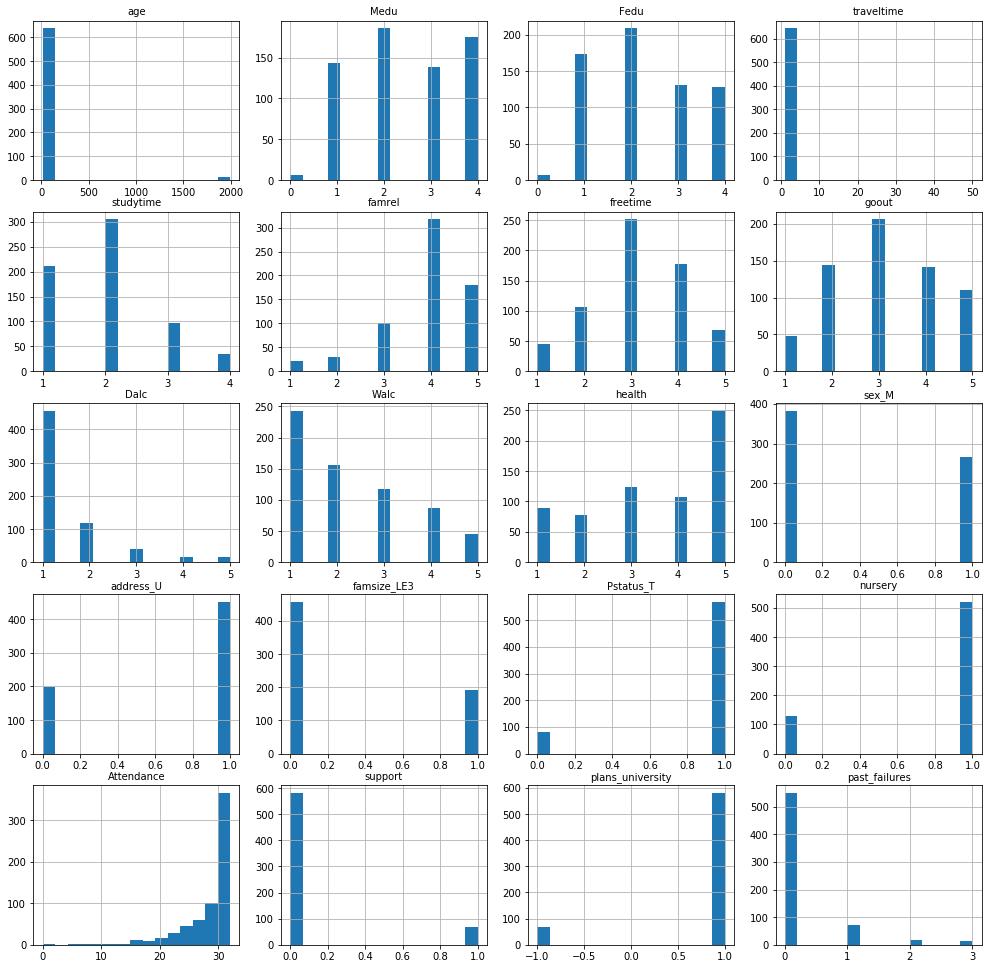

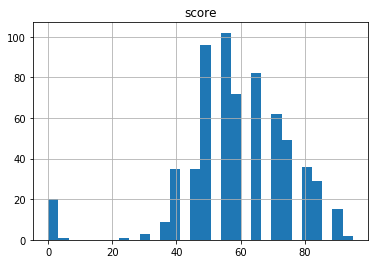

In [252]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 17))

for idx, header in enumerate(data.columns.values.tolist()):
    plt.subplot(5, 4, idx + 1)
    plt.title(header, size='medium')
    data[header].hist(bins=15)

plt.show()

scores.hist(bins=30)
plt.show()

From these histograms It is obviously that we have mistakes in **age** and **traveltime** columns.
In **age** there is *year of birth* instead of *age* and in **traveltime** there is *time in minutes* instead of corresponding scale.

In [253]:
data['age'] = data['age'].apply(lambda x: 2006 - x if x > 1000 else x)

def time_scale(x):
    if x < 15:
        return 1
    elif x < 30:
        return 2
    elif x < 60:
        return 3
    else:
        return 4

time = data['traveltime']
    
data.loc[np.where(time > 4)[0], 'traveltime'] = time[np.where(time > 4)[0]].apply(time_scale)

Now let's check prediction errors on all objects. I will choose 30 objects with biggest errors and check their features for mistakes.

In [254]:
regr = LinearRegression()
regr.fit(data, scores)

pred = regr.predict(data)
true = np.array(scores)

#choose 30 objects with biggest error
err = abs(true - pred).flatten().argsort()[-30:]

After a little research It is easy to notice that in **scores** some values are in incorrect form (0.1 insted of 10 etc.).

In [255]:
scores['score'] = scores['score'].apply(lambda x: x * 100 if x % 5 != 0 else x)

##Final prediction##

In [257]:
regr = LinearRegression()
print (abs(cross_val_score(regr, data, y=scores, cv=15, scoring='neg_mean_squared_error').mean()))

198.432344793
